In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder



In [2]:
train = 'Training data.xlsx'
data = pd.read_excel(train)


In [3]:
label_encoder_internet = LabelEncoder()
label_encoder_sex = LabelEncoder()
data['internet'] = label_encoder_internet.fit_transform(data['internet'])
data['sex'] = label_encoder_sex.fit_transform(data['sex'])

In [4]:
x_train = np.array(data.iloc[:, 0:8])
y_train = np.array(data.iloc[:, 8]).reshape(-1, 1)


In [6]:
def plot_features(x_train, y_train, feature_names):
    for i, feature in enumerate(feature_names):
        plt.figure(figsize=(8, 6))
        plt.scatter(x_train[:, i], y_train, alpha=0.5)
        plt.title(f'{feature} vs Marks')
        plt.xlabel(feature)
        plt.ylabel('Marks')
        plt.show()


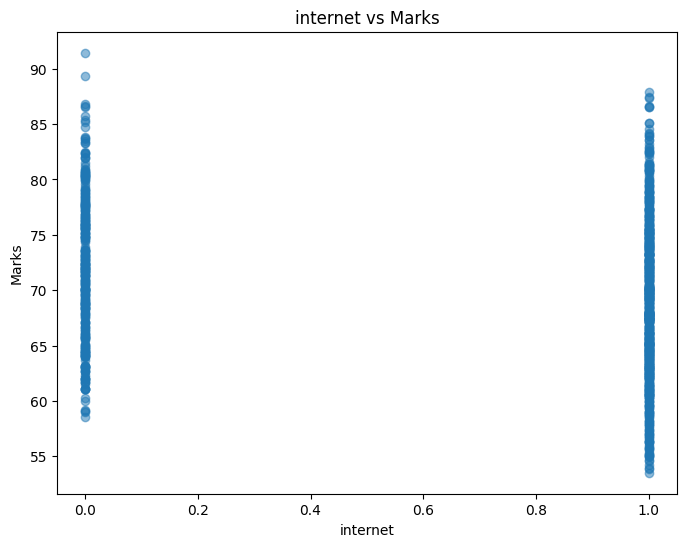

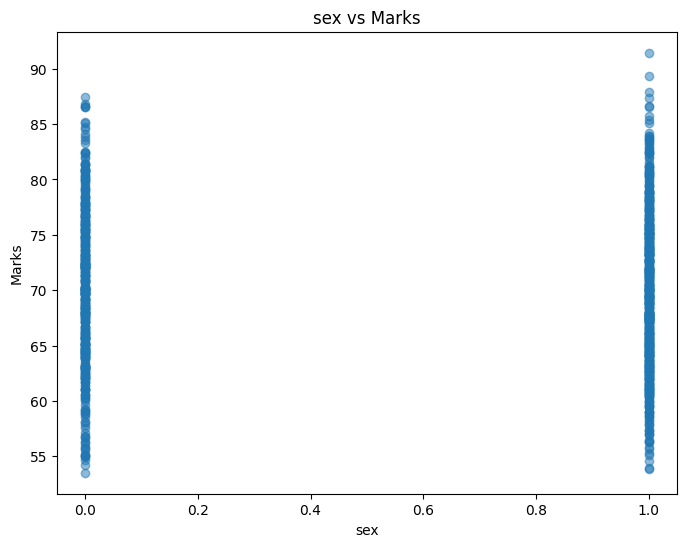

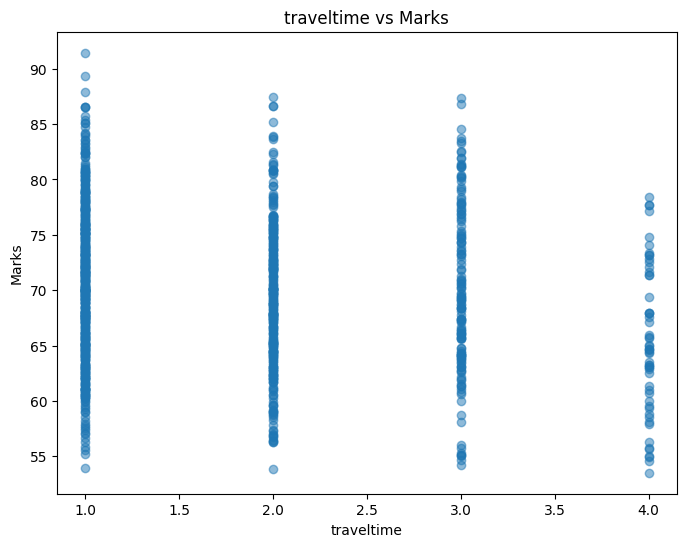

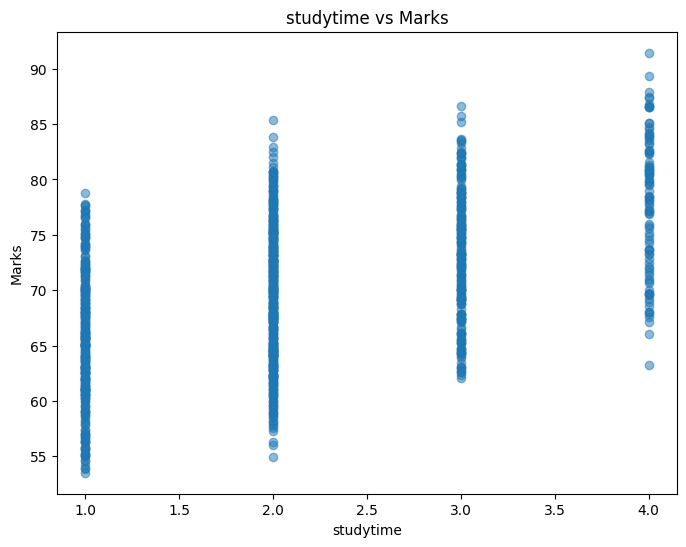

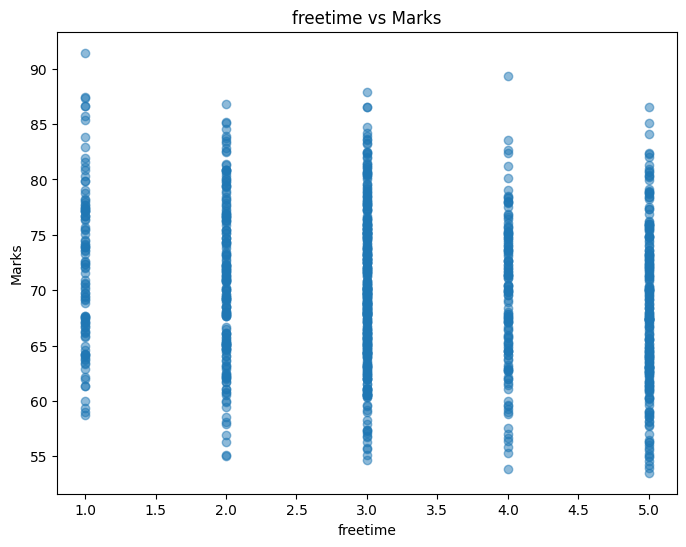

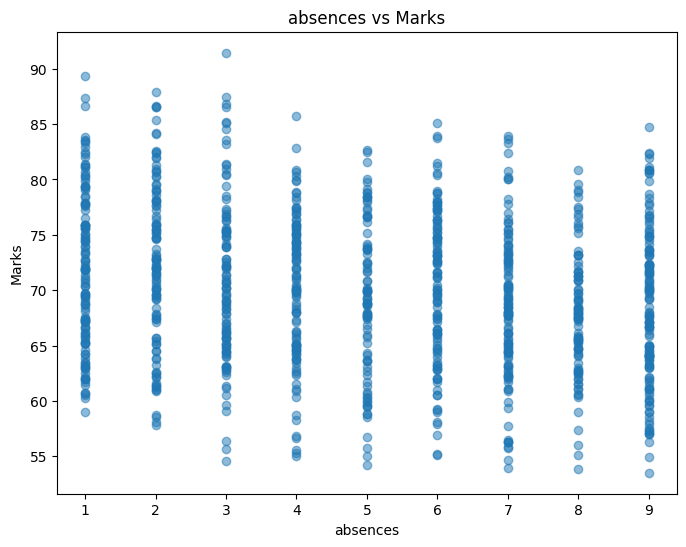

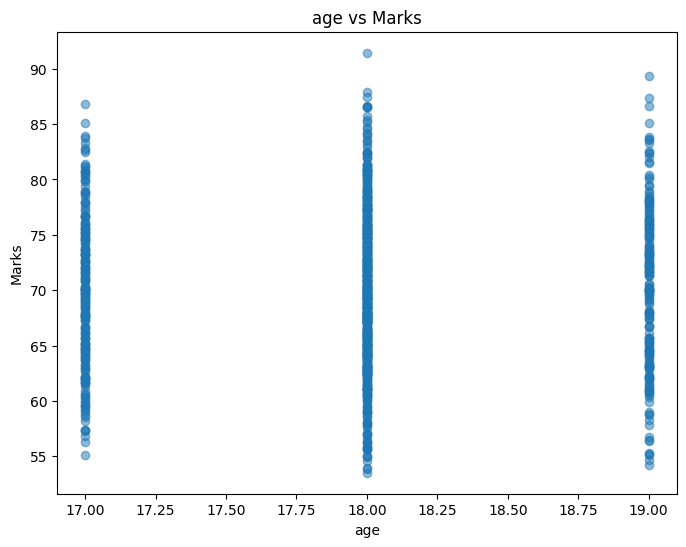

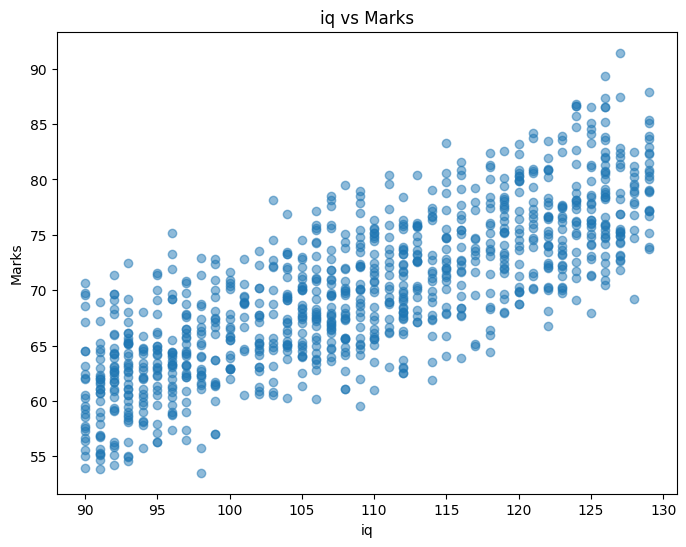

In [9]:
feature_names = data.columns[:-1]
plot_features(x_train, y_train, feature_names)


In [10]:
def feature_changing(x_train):

    age_iq_product = x_train[:, 6] * x_train[:, 7]
  
    iq_squared = x_train[:, 7] ** 2
    

    x_train = np.hstack((x_train, age_iq_product.reshape(-1, 1), iq_squared.reshape(-1, 1)))
    return x_train

x_train = feature_changing(x_train)
x_train.shape 

(1000, 10)

In [11]:
def z_score(x_train):
   
    x_mean = np.mean(x_train, axis=0)
    x_std = np.std(x_train, axis=0)
    
    x_train = (x_train - x_mean) / x_std
    
    return x_train, x_std, x_mean


x_train_scaled, x_std, x_mean = z_score(x_train)


In [13]:
"Scaled x_train:", x_train_scaled


('Scaled x_train:',
 array([[-1.46446375,  0.85621391,  0.28676652, ...,  0.7714015 ,
          0.74741114,  0.74813448],
        [ 0.6828438 ,  0.85621391,  0.28676652, ..., -0.17415416,
          0.33249683, -0.22538641],
        [ 0.6828438 ,  0.85621391,  1.39826467, ..., -0.08819456,
         -0.07329849, -0.14081793],
        ...,
        [ 0.6828438 ,  0.85621391,  0.28676652, ...,  1.20119954,
          0.59694771,  1.22211131],
        [ 0.6828438 , -1.16793244, -0.82473162, ..., -0.43203298,
         -0.87577013, -0.47437175],
        [ 0.6828438 ,  0.85621391, -0.82473162, ...,  1.63099757,
          1.56812077,  1.71575524]]))

In [14]:
"Mean of each feature (should be close to 0):" ,np.mean(x_train_scaled, axis=0)


('Mean of each feature (should be close to 0):',
 array([-1.50990331e-16,  5.15143483e-17, -2.57571742e-17,  1.38555833e-16,
         1.61648472e-16,  1.13686838e-16,  1.25410793e-15,  3.22408766e-16,
        -9.68114477e-17, -3.19744231e-16]))

In [15]:
"Standard deviation of each feature (should be close to 1):", np.std(x_train_scaled, axis=0)

('Standard deviation of each feature (should be close to 1):',
 array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]))

In [16]:
def cost(x_train, y_train, w, b):
   
    m = x_train.shape[0]
    
    predictions = np.dot(x_train, w) + b
    
    loss = (1 / (2 * m)) * np.sum((predictions - y_train) ** 2)
    
    return loss



In [17]:
w = np.zeros((x_train.shape[1], 1))
b = 0

current_cost = cost(x_train, y_train, w, b)
"Initial cost:", current_cost

('Initial cost:', 2471.2992427500003)

In [23]:
def gradient_descent(x_train, y_train, w, b, learning_rate=0.01, num_iterations=1000):
    m = x_train.shape[0] 
    
    for i in range(num_iterations):
        predictions = np.dot(x_train, w) + b
        
        dw = (1 / m) * np.dot(x_train.T, (predictions - y_train))
        db = (1 / m) * np.sum(predictions - y_train)
        
        w = w - learning_rate * dw
        b = b - learning_rate * db
        
        if i % 100 == 0:
            loss = cost(x_train, y_train, w, b)
            print( f"Iteration {i}: Cost = {loss}")
    
    return w, b



In [20]:
w = np.zeros((x_train.shape[1], 1))
b = 0

w, b = gradient_descent(x_train, y_train, w, b)
"Final weights:",w
"Final bias:", b

C:\Users\eshik\AppData\Local\Temp\ipykernel_21092\3701217380.py:10: RuntimeWarning: invalid value encountered in subtract
  w = w - learning_rate * dw


('Final bias:', nan)

In [ ]:
x_train = x_train.astype(np.float64)
x_train,x_std,x_mean = z_score(x_train)

np.random.seed(2147483647)
w = np.random.randn(x_train.shape[1],1)
b = np.random.randn(1)

old_cost = 0

while abs(old_cost - cost(x_train,y_train,w,b))>0.00001:
  old_cost = cost(x_train,y_train,w,b)
  w,b = gradient_descent(x_train,y_train,w,b)

x_predict = pd.read_excel('Test data.xlsx').iloc[:,:8].to_numpy()
x_predict = feature_changing(x_predict)
x_predict = (x_predict - x_mean)/x_std
ans = pd.read_excel('Test data.xlsx').iloc[:,8].to_numpy()

y_predict = np.dot(x_predict,w) + b

accuracy = 0
for dim in range(len(ans)):
  if abs(y_predict[dim]-ans[dim])<0.5: # do not change the tolerance as you'll be checked on +- 0.5 error only
    accuracy += 1
accuracy = round(accuracy*100/200.0,2)
ok = 'Congratulations' if accuracy>95 else 'Optimization required'
print(f"{ok}, your accuracy is {accuracy}%")

Iteration 0: Cost = 2420.0797769254423
Iteration 100: Cost = 323.05561106252287
Iteration 200: Cost = 43.298905729986274
Iteration 300: Cost = 5.810827147340971
Iteration 400: Cost = 0.786619099235066
Iteration 500: Cost = 0.11320689225534353
Iteration 600: Cost = 0.022925360110920643
Iteration 700: Cost = 0.010805973796051312
Iteration 800: Cost = 0.009164342014787328
Iteration 900: Cost = 0.008927463288617514
Iteration 0: Cost = 0.008878986428082585
Iteration 100: Cost = 0.008855823593315843
Iteration 200: Cost = 0.008836104640926646
Iteration 300: Cost = 0.008816896115564124
Iteration 400: Cost = 0.008797804329036912
Iteration 500: Cost = 0.00877877629449521
Iteration 600: Cost = 0.008759804740767927
Iteration 700: Cost = 0.00874088853314095
Iteration 800: Cost = 0.008722027361363387
Iteration 900: Cost = 0.008703221026471475
Iteration 0: Cost = 0.008684469344998348
Iteration 100: Cost = 0.008665772136100421
Iteration 200: Cost = 0.008647129219824296
Iteration 300: Cost = 0.00862854